In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
#Basic imports
import numpy as np
import pandas as pd

#sklearn imports
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import warnings
warnings.simplefilter('ignore')

df = pd.read_csv("/content/drive/MyDrive/heart.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Since the dataset contains numerical and categorical data (numerically encoded categorical data). Therefore the first step will be to perform one-hot encoding on the categorical data to be able to compute the eucledean distance with k-means.

## 1. Normalize the data using Min-max scaler

In [ ]:
#oldpeak to int
df['oldpeak'] = df['oldpeak'].astype(int) 
#categorical to object
df['sex'] = df['sex'].astype(object) 
df['cp'] = df['cp'].astype(object) 
df['fbs'] = df['fbs'].astype(object) 
df['restecg'] = df['restecg'].astype(object) 
df['exang'] = df['exang'].astype(object) 
df['slope'] = df['slope'].astype(object) 
df['ca'] = df['ca'].astype(object) 
df['thal'] = df['thal'].astype(object) 
df['target'] = df['target'].astype(object) 

In [ ]:
#X = df.copy()

In [ ]:
#normalize numerical features
from sklearn.preprocessing import MinMaxScaler

df_norm = df.copy()
scaler = MinMaxScaler()
#scaler.fit(data)
df_norm[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.fit_transform(df_norm[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

In [ ]:
df_norm.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1,0,0.292453,0.196347,0,1,0.740458,0,0.166667,2,2,3,0
1,0.500000,1,0,0.433962,0.175799,1,0,0.641221,1,0.500000,0,0,3,0
2,0.854167,1,0,0.481132,0.109589,0,1,0.412214,1,0.333333,0,0,3,0


## 2. Transform categorical to normal features using One-hot Encoding

In [ ]:
#We use pandas's 'get_dummies()' method for hot-encoding
df_norm = pd.get_dummies(df_norm, columns = ['fbs', 'sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target' ])

In [ ]:
df_norm.head(3)

,age,trestbps,chol,thalach,oldpeak,fbs_0,fbs_1,sex_0,sex_1,cp_0,...,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,target_0,target_1
0,0.479167,0.292453,0.196347,0.740458,0.166667,1,0,0,1,1,...,0,1,0,0,0,0,0,1,1,0
1,0.500000,0.433962,0.175799,0.641221,0.500000,0,1,0,1,1,...,0,0,0,0,0,0,0,1,1,0
2,0.854167,0.481132,0.109589,0.412214,0.333333,1,0,0,1,1,...,0,0,0,0,0,0,0,1,1,0


## 3. Perform dimensionality reduction with PCA:
 We will use these principal components to help us visualize our clusters in 1-D, 2-D, and 3-D space, since we cannot easily visualize the data we have in higher dimensions. For example, we can use two principal components to visualize the clusters in 2-D space, or three principal components to visualize the clusters in 3-D space.

In [ ]:
#PCA with one principal component
pca_1d = PCA(n_components=1)

#PCA with two principal components
pca_2d = PCA(n_components=2)

In [ ]:
#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(df_norm))

In [ ]:
#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#"PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

In [ ]:
df_norm = pd.concat([df_norm,PCs_2d], axis=1, join='inner')

In [ ]:
df_norm.head(3)

,age,trestbps,chol,thalach,oldpeak,fbs_0,fbs_1,sex_0,sex_1,cp_0,...,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,target_0,target_1,PC1_2d,PC2_2d
0,0.479167,0.292453,0.196347,0.740458,0.166667,1,0,0,1,1,...,0,0,0,0,0,1,1,0,0.633101,-1.181572
1,0.500000,0.433962,0.175799,0.641221,0.500000,0,1,0,1,1,...,0,0,0,0,0,1,1,0,1.463991,0.124829
2,0.854167,0.481132,0.109589,0.412214,0.333333,1,0,0,1,1,...,0,0,0,0,0,1,1,0,1.209447,-0.977817


## 4. Start Clustering
###a) K-means

First step is to find the optimal number of clusters with te help of the elbow method

Sources:

https://www.kaggle.com/code/minc33/visualizing-high-dimensional-clusters/notebook

https://towardsdatascience.com/clustering-on-numerical-and-categorical-features-6e0ebcf1cbad

 https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

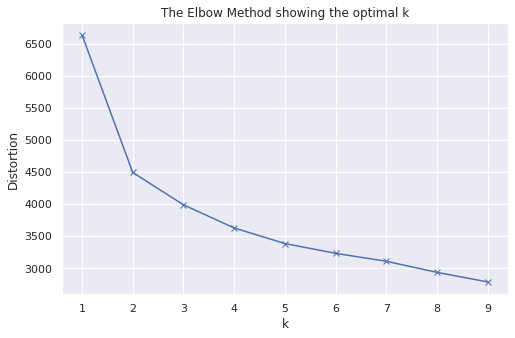

In [ ]:
distortions = []
Y = df_norm
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Y)
    distortions.append(kmeanModel.inertia_)
    plt.figure(figsize=(8,5))


plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1
1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

Source: https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c#:~:text=Silhouette%20Coefficient%20or%20silhouette%20score%20is%20a%20metric%20used%20to,each%20other%20and%20clearly%20distinguished.

In [ ]:
from sklearn.metrics import silhouette_score

#Initialize our model
kmeans = KMeans(n_clusters=3)
#Fit our model
clusters = kmeans.fit(df_norm)
#Find which cluster each data-point belongs to
label = kmeans.predict(df_norm)
#Add the cluster vector to our DataFrame, X
df_norm["Cluster"] = clusters.labels_

print(f'Silhouette Score(n=2): {silhouette_score(df_norm, label)}')

Silhouette Score(n=2): 0.2927013316298945


In [ ]:
df_norm["dummy"] = 0
#Note that all of the DataFrames below are sub-DataFrames of 'plotX'.
#This is because we intend to plot the values contained within each of these DataFrames.

#cluster0 = df_norm[df_norm["Cluster"] == 0]
#cluster1 = df_norm[df_norm["Cluster"] == 1]
#cluster2 = df_norm[df_norm["Cluster"] == 2]
#cluster3 = df_norm[df_norm["Cluster"] == 3]
#cluster4 = df_norm[df_norm["Cluster"] == 4]


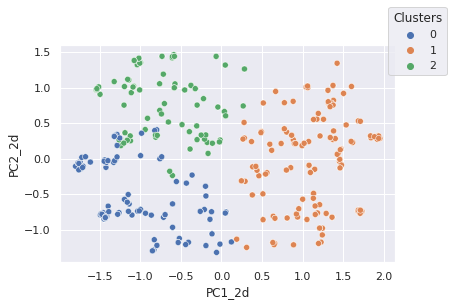

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.scatterplot(data=df_norm, x="PC1_2d", y="PC2_2d", hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

# DBSCAN

Sources:

https://www.reneshbedre.com/blog/dbscan-python.html

https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html

In [ ]:
df_dbscan = df_norm.copy()
df_dbscan = df_norm[['PC1_2d','PC2_2d']]

In [ ]:
df_dbscan.columns

Index(['PC1_2d', 'PC2_2d'], dtype='object')

### Find the optimal value for epsilon (this is somehow not looking correct)
Source: https://www.reneshbedre.com/blog/dbscan-python.html

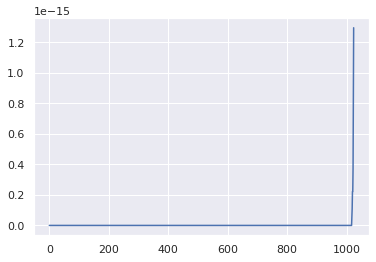

In [ ]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_dbscan)

distances, indices = nbrs.kneighbors(df_dbscan)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.plot(distances)

In [ ]:
from sklearn.cluster import DBSCAN

# Configuring the parameters of the clustering algorithm
# eps: maximum distance between two points
# min_samples: the larger the data set, the larger the no. of minimum points should be
dbscan_cluster = DBSCAN(eps=0.3, min_samples=30)

# Fitting the clustering algorithm
dbscan_cluster.fit(df_dbscan)

# Adding the results to a new column in the dataframe
df_dbscan["cluster"] = dbscan_cluster.labels_

In [ ]:
from collections import Counter
Counter(dbscan_cluster.labels_)
# output

Counter({-1: 213, 0: 294, 1: 82, 2: 228, 3: 36, 5: 56, 4: 116})

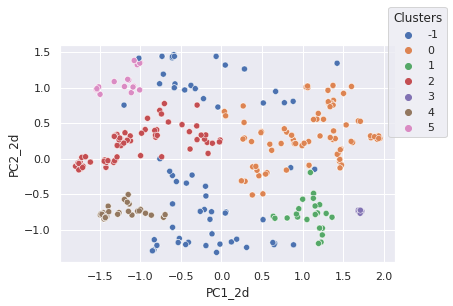

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.scatterplot(data=df_dbscan, x="PC1_2d", y="PC2_2d", hue=dbscan_cluster.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

In [ ]:
df_dbscan.columns

Index(['PC1_2d', 'PC2_2d', 'cluster'], dtype='object')